In [32]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [33]:
# Leer dataframe de videojuegos
games=pd.read_csv("steam_games.csv")

1.DATA UNDERSTANDING

- Datframe shape
- head, tail
- dtypes
- describe


In [34]:
games.shape

(32135, 13)

In [35]:
games.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,0.0,761140.0,Kotoshiro
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,0.0,643980.0,Secret Level SRL
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,0.0,670290.0,Poolians.com
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,0.0,767400.0,彼岸领域
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,0.0,773570.0,NaN


In [36]:
games.tail()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
32130,Ghost_RUS Games,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"['Strategy', 'Indie', 'Casual', 'Simulation']",http://steamcommunity.com/app/773640/reviews/?...,"['Single-player', 'Steam Achievements']",1.99,0.0,773640.0,"Nikita ""Ghost_RUS"""
32131,Sacada,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"['Strategy', 'Indie', 'Casual']",http://steamcommunity.com/app/733530/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",4.99,0.0,733530.0,Sacada
32132,Laush Studio,"['Indie', 'Racing', 'Simulation']",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",http://steamcommunity.com/app/610660/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich
32133,SIXNAILS,"['Casual', 'Indie']",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...",http://steamcommunity.com/app/658870/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",4.99,0.0,658870.0,"xropi,stev3ns"
32134,NaN,NaN,Maze Run VR,NaN,http://store.steampowered.com/app/681550/Maze_...,NaN,"['Early Access', 'Adventure', 'Indie', 'Action...",http://steamcommunity.com/app/681550/reviews/?...,"['Single-player', 'Stats', 'Steam Leaderboards...",4.99,1.0,681550.0,NaN


In [37]:
games.describe()

,early_access,id
count,32135.000000,3.213300e+04
mean,0.060588,4.517574e+05
std,0.238577,1.827140e+05
min,0.000000,1.000000e+01
25%,0.000000,3.292800e+05
50%,0.000000,4.520600e+05
75%,0.000000,5.934000e+05
max,1.000000,2.028850e+06


2. DATA PREPARATION

- Eliminar columnas y filas irrelevantes
- cambiar datos de las columnas
- Cambiar los tipos de columnas
- Eliminar la puntuacion de los string

In [38]:
#ELIMINAR COLUMNAS QUE NO SIRVEN PARA EL ANALISIS
#la columna title contiene la misma informacion que app
games.drop(columns=["title"], inplace=True)
#la informacion en las url no es importante
games.drop(columns=["url", "reviews_url","tags"], inplace=True)
#eliminar las filas que tienen mas de 4 nan
games.dropna(thresh=9, inplace=True)


In [39]:
#CONVERTIR LA COLUMNA DE PRECIO PARA QUE SEA NUMERICA

In [40]:
#sacar una lista de strings para cambiar la columna de precio por valores numericos
list_string=[]
for i in games["price"]:
    try:
        float(i)
    except:
        list_string.append(i)

print(list_string)

list_string=set(list_string)
list_string=list(list_string)

['Free To Play', 'Free to Play', 'Free', 'Free', 'Free', 'Free to Play', 'Free', 'Free', 'Free', 'Free to Play', 'Free to Play', 'Free to Play', 'Free', 'Free to Play', 'Free to Play', 'Free to Play', 'Free to Play', 'Free to Play', 'Free to Play', 'Free Demo', 'Free Demo', 'Play for Free!', 'Free to Play', 'Play for Free!', 'Free to Play', 'Free to Play', 'Free', 'Free', 'Free to Play', 'Free to Play', 'Free to Play', 'Free to Play', 'Free To Play', 'Free', 'Free to Play', 'Free', 'Free To Play', 'Free', 'Free', 'Free to Play', 'Free to Play', 'Free to Play', 'Free to Play', 'Install Now', 'Free To Play', 'Free', 'Free to Play', 'Free', 'Free', 'Free To Play', 'Free to Play', 'Free to Play', 'Free', 'Free', 'Free to Play', 'Play WARMACHINE: Tactics Demo', 'Free', 'Free to Play', 'Free to Play', 'Free', 'Free', 'Free to Play', 'Free', 'Free', 'Free To Play', 'Free to Play', 'Free to Play', 'Free to Play', 'Free Mod', 'Free to Play', 'Free to Play', 'Free', 'Free to Play', 'Free to Play

In [41]:
#convertir los strings en precios
games['price'] = games['price'].apply(lambda x: 0 if x in list_string
                                                        else 499.0 if x=='Starting at $499.00'
                                                        else 449.0 if x=='Starting at $449.00'
                                                        else x)

In [42]:
#CAMBIAR LOS DATOS DENTRO DE LAS COLUMNAS
#cambiar el tipo de columna de precio a float
games["price"]=games["price"].astype(float)
#cambiar la columna fecha a date time
games['release_date'] = pd.to_datetime(games['release_date'], errors='coerce')
#cambio la columna de id a string
games["id"]=games["id"].astype(str)

In [43]:
#la columna de date time solo debe tener fechas y no horas
games['release_date'] = games['release_date'].dt.date

In [44]:
#ELIMINAR LA PUNTUACION
import string
games["publisher"] = games["publisher"].str.replace('[{}]'.format(string.punctuation), '',regex=True)
games["app_name"] = games["app_name"].str.replace('[{}]'.format(string.punctuation), '',regex=True)
games["developer"] = games["developer"].str.replace('[{}]'.format(string.punctuation), '',regex=True)

In [45]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22520 entries, 0 to 32133
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     22520 non-null  object 
 1   genres        22520 non-null  object 
 2   app_name      22520 non-null  object 
 3   release_date  22486 non-null  object 
 4   specs         22520 non-null  object 
 5   price         22520 non-null  float64
 6   early_access  22520 non-null  float64
 7   id            22520 non-null  object 
 8   developer     22520 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.7+ MB


- Identificar duplicados en las columnas
- Identificar los nan en las columnas
- Cambiar las columnas en variables dummy

In [46]:
#ELIMINAR DUPLICADOS
games = games.drop_duplicates(keep="first")

In [47]:
#buscar Nan
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22519 entries, 0 to 32133
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     22519 non-null  object 
 1   genres        22519 non-null  object 
 2   app_name      22519 non-null  object 
 3   release_date  22485 non-null  object 
 4   specs         22519 non-null  object 
 5   price         22519 non-null  float64
 6   early_access  22519 non-null  float64
 7   id            22519 non-null  object 
 8   developer     22519 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.7+ MB


In [48]:
#completar los nan

games["genres"].fillna((games["genres"].mode()[0]),inplace=True)
games["release_date"].fillna((games["release_date"].mode()[0]),inplace=True)
games["publisher"].fillna(method="ffill",inplace=True)
#games["tags"].fillna(method="ffill",inplace=True)
#games["reviews_url"].fillna(method="ffill",inplace=True)
games["specs"].fillna((games["specs"].mode()[0]),inplace=True)
games["price"].fillna((games["price"].mode()[0]),inplace=True)
games["id"].fillna(method="ffill",inplace=True)
games["developer"].fillna((games["developer"].mode()[0]),inplace=True)


In [49]:
#CAMBIAR LAS COLUMNAS DE GENERO Y SPECS
#definir una funcion para cambiar a listas los datos de las columnas
import ast
def tolist(lst):
    if isinstance(lst, str) :
        lst = lst.replace("0's",'0s')
        lst = ast.literal_eval(lst)

    return list(lst)

In [50]:
#convertir a listas
games['genres'] = games['genres'].apply(lambda x : tolist(x))
games['specs'] = games['specs'].apply(lambda x : tolist(x))

In [51]:
# crear las columnas binarias de los géneros
def create_genre_columns(dataframe):
    genres_list = set()

    # se crea el set con los valores DISTINCT de los géneros
    for genres in dataframe['genres']:
        if isinstance(genres, list):
            genres_list.update(genres)
    
    # crea una columna por cada genre en genre_list 
    # le aplica luego se recore la columna genre imputando 1 cuando existe ese genero 
    # en la fila analizada
    for genre in genres_list:
        dataframe["genre_" + genre] = dataframe['genres'].apply(lambda x: 1 if genre in x else 0)
    
    return dataframe

create_genre_columns(games)


,publisher,genres,app_name,release_date,specs,price,early_access,id,developer,genre_Simulation,...,genre_Free to Play,genre_Software Training,genre_Utilities,genre_Racing,genre_Photo Editing,genre_Early Access,genre_Animation &amp; Modeling,genre_Massively Multiplayer,genre_Casual,genre_Web Publishing
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,[Single-player],4.99,0.0,761140.0,Kotoshiro,1,...,0,0,0,0,0,0,0,0,1,0
1,Making Fun Inc,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,"[Single-player, Multi-player, Online Multi-Pla...",0.00,0.0,643980.0,Secret Level SRL,0,...,1,0,0,0,0,0,0,0,0,0
2,Poolianscom,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D Poolians,2017-07-24,"[Single-player, Multi-player, Online Multi-Pla...",0.00,0.0,670290.0,Poolianscom,1,...,1,0,0,0,0,0,0,0,1,0
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,[Single-player],0.99,0.0,767400.0,彼岸领域,0,...,0,0,0,0,0,0,0,0,1,0
5,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018-01-04,"[Single-player, Steam Achievements]",3.99,0.0,772540.0,Trickjump Games Ltd,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32129,Bidoniera Games,"[Action, Adventure, Casual, Indie]",Kebab it Up,2018-01-04,"[Single-player, Steam Achievements, Steam Cloud]",1.99,0.0,745400.0,Bidoniera Games,0,...,0,0,0,0,0,0,0,0,1,0
32130,GhostRUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018-01-04,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,Nikita GhostRUS,1,...,0,0,0,0,0,0,0,0,1,0
32131,Sacada,"[Casual, Indie, Strategy]",LOGistICAL South Africa,2018-01-04,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada,0,...,0,0,0,0,0,0,0,0,1,0
32132,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,2018-01-04,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich,1,...,0,0,0,1,0,0,0,0,0,0


In [52]:
# el codigo es el mismo para la columna specs
def create_specs_columns(dataframe):
    specs_list = set()

    for specs in dataframe['specs']:
        if isinstance(specs, list):
            specs_list.update(specs)
    
    for specs in specs_list:
        dataframe["specs_" + specs] = dataframe['specs'].apply(lambda x: 1 if specs in x else 0)
    
    return dataframe

create_specs_columns(games)

,publisher,genres,app_name,release_date,specs,price,early_access,id,developer,genre_Simulation,...,specs_Valve Anti-Cheat enabled,specs_Multi-player,specs_Steam Turn Notifications,specs_MMO,specs_Includes Source SDK,specs_SteamVR Collectibles,specs_Stats,specs_Includes level editor,specs_Local Co-op,specs_Partial Controller Support
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,[Single-player],4.99,0.0,761140.0,Kotoshiro,1,...,0,0,0,0,0,0,0,0,0,0
1,Making Fun Inc,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,"[Single-player, Multi-player, Online Multi-Pla...",0.00,0.0,643980.0,Secret Level SRL,0,...,0,1,0,0,0,0,0,0,0,0
2,Poolianscom,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D Poolians,2017-07-24,"[Single-player, Multi-player, Online Multi-Pla...",0.00,0.0,670290.0,Poolianscom,1,...,0,1,0,0,0,0,1,0,0,0
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,[Single-player],0.99,0.0,767400.0,彼岸领域,0,...,0,0,0,0,0,0,0,0,0,0
5,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018-01-04,"[Single-player, Steam Achievements]",3.99,0.0,772540.0,Trickjump Games Ltd,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32129,Bidoniera Games,"[Action, Adventure, Casual, Indie]",Kebab it Up,2018-01-04,"[Single-player, Steam Achievements, Steam Cloud]",1.99,0.0,745400.0,Bidoniera Games,0,...,0,0,0,0,0,0,0,0,0,0
32130,GhostRUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018-01-04,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,Nikita GhostRUS,1,...,0,0,0,0,0,0,0,0,0,0
32131,Sacada,"[Casual, Indie, Strategy]",LOGistICAL South Africa,2018-01-04,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada,0,...,0,0,0,0,0,0,1,0,0,0
32132,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,2018-01-04,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich,1,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#eliminar las columnas originales
games.drop(columns=["genres", "specs"], inplace=True)

3.FEATURE UNDERSTANDING
 *plot de las distribuciones
    - histogramas
    - boxplot

Text(0, 0.5, 'cuenta')

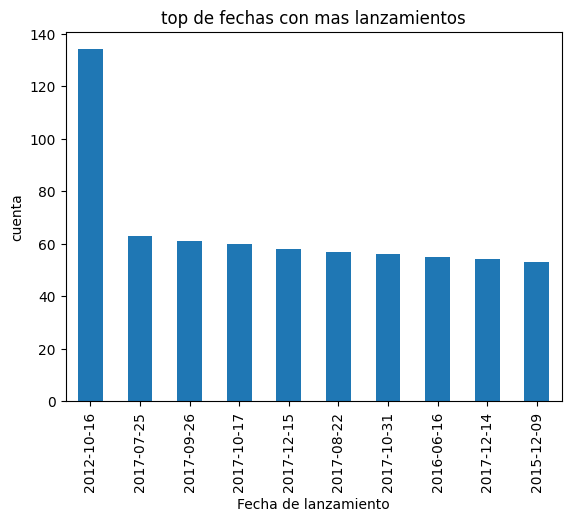

In [54]:
#fecha frecuencias
ax=games["release_date"].value_counts() \
    .head(10) \
    .plot(kind="bar", title="top de fechas con mas lanzamientos")
ax.set_xlabel("Fecha de lanzamiento")
ax.set_ylabel("cuenta")

Text(0, 0.5, 'cuenta')

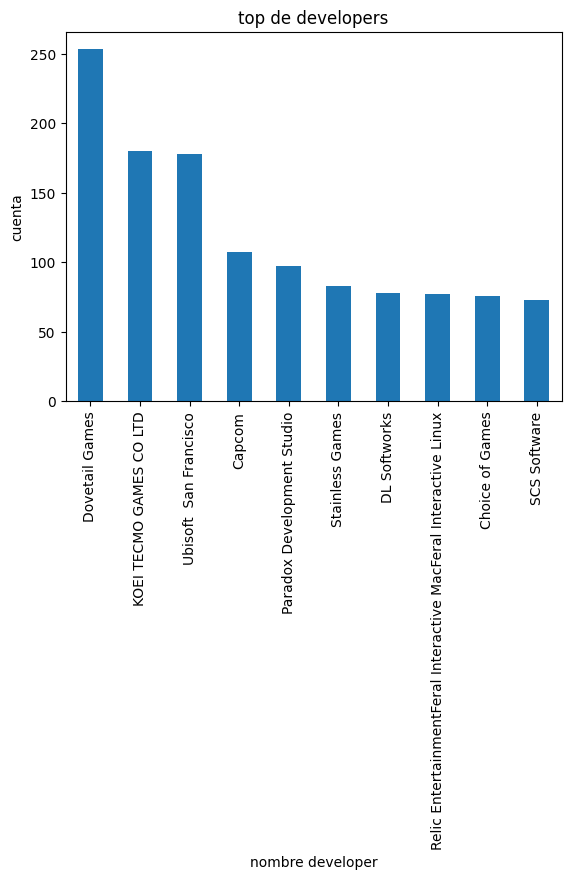

In [55]:
#developer frecuencias
ax=games["developer"].value_counts() \
    .head(10) \
    .plot(kind="bar", title="top de developers")
ax.set_xlabel("nombre developer")
ax.set_ylabel("cuenta")


Text(0, 0.5, 'cuenta')

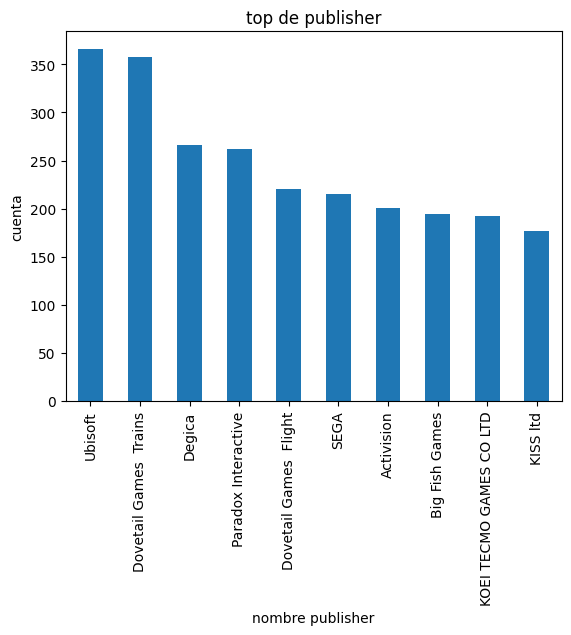

In [56]:
#publisher frecuencias
ax=games["publisher"].value_counts() \
    .head(10) \
    .plot(kind="bar", title="top de publisher")
ax.set_xlabel("nombre publisher")
ax.set_ylabel("cuenta")

Text(0, 0.5, 'cuenta')

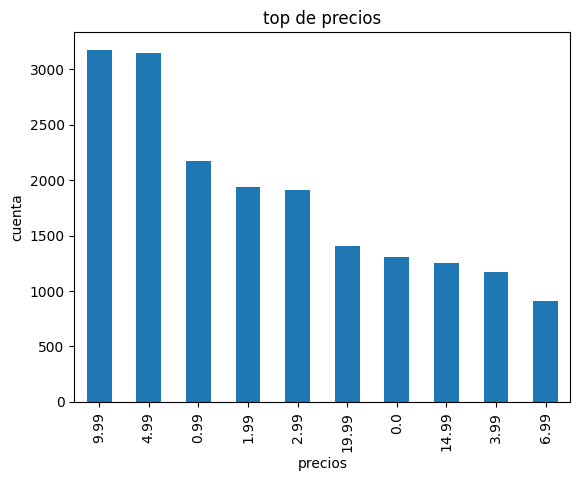

In [57]:
#precios frecuencias
ax=games["price"].value_counts() \
    .head(10) \
    .plot(kind="bar", title="top de precios")
ax.set_xlabel("precios")
ax.set_ylabel("cuenta")

<AxesSubplot: ylabel='price'>

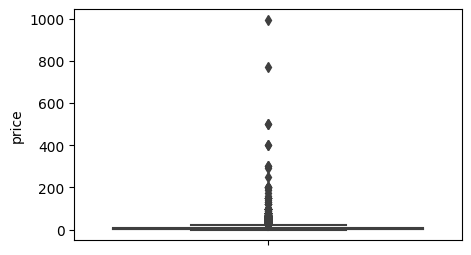

In [59]:
#boxplot para la variable precio
plt.figure(figsize=(5,3))
sns.boxplot(data=games,y="price")

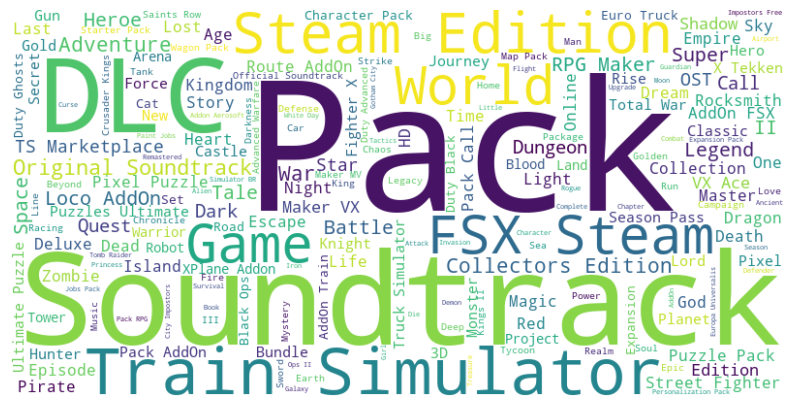

In [ ]:
#importar la libreria woridcloud
from wordcloud import WordCloud

# Concatenar todos los elementos de la columna "app_name" en un solo texto
text = ' '.join(games["app_name"])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

4. FEATURE RELASHIONSHIP
    - scatterplot
    - heatmpap corr
    - pairplot
    - groupby

In [ ]:
#no se puede hacer mucho con las variables pues tienen diferentes nombres, haremos agrupaciones en base a las cuentas
df2=games.loc[:,["publisher","app_name","id","developer"]]
by_developer=df2.groupby("developer")
by_developer.count()


In [71]:
#agrupamos para saber cuanto gastaron por publisher
df3=games.loc[:,["publisher","price"]]
by_publisher=df3.groupby("publisher")
by_publisher.sum()

,price
publisher,
,9.99
100 Plus Games llc,4.99
100 Stones Interactive,24.97
10101 Software,0.99
101XP,0.00
...,...
绿叶工作室,5.99
自由愉悦小黄猫Free pleasure little yellow cat,0.99
致意,10.96


In [74]:
#agrupamos para saber cuanto gastaron por app_name
df4=games.loc[:,["app_name","price"]]
by_app_name=df4.groupby("app_name")
by_app_name.sum()

,price
app_name,
Arcane RERaise,2.99
Arcane Raise,2.99
Arcane preRaise,2.99
Occult RERaise,5.99
Occult Raise,5.99
...,...
鸿源战纪 Tales of Hongyuan,12.99
龙魂时刻,0.00
４人打ちアクション麻雀 ACTION MAHJONG,9.99


In [75]:
#agrupamos para saber cuanto gastaron por id del juego
df5=games.loc[:,["id","price"]]
by_id=df5.groupby("id")
by_id.sum()

,price
id,
10.0,9.99
1002.0,9.99
10090.0,19.99
100980.0,99.99
10100.0,19.99
...,...
9970.0,9.99
99700.0,9.99
9980.0,6.99
